# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [12]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# add a third dimension of gaussian noise
X = np.concatenate([X, np.random.randn(2500, 1)], axis=1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 3])

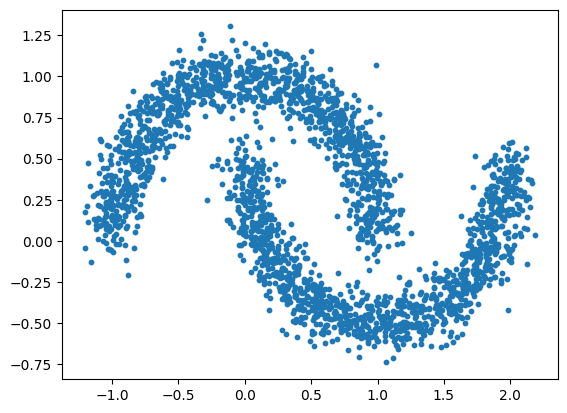

In [13]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [14]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 1,
    'p_lim': 0.5,
    'batch_size': 128,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 459 | Loss: 2.2401 | p-value: 5.48E-01:  92%|█████████▏| 458/500 [1:52:59<10:21, 14.80s/it]  


Early stopping at epoch 459
Fisher combined Shapiro-Wilk p-value:	0.5481485351798183


0.5481485351798183

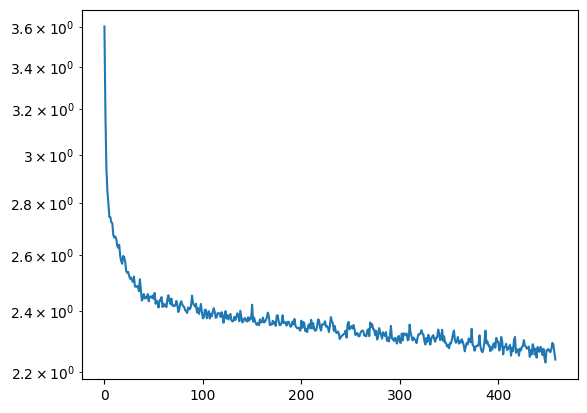

In [15]:
plt.plot(LAM.loss_history)
plt.yscale('log')

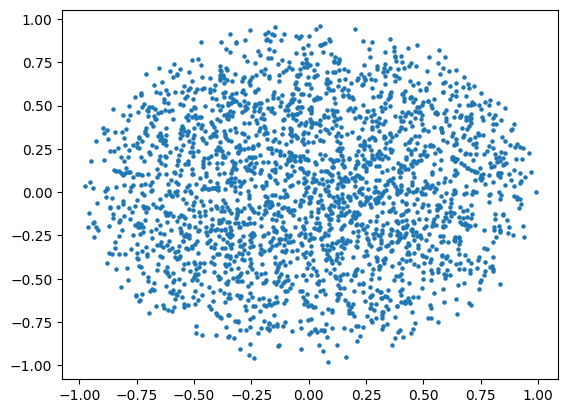

In [16]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [17]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 1463, 2273, 2085, 2372,  446, 1798, 1285, 2366,  796,  584,
         1076,  579, 1413, 1032,  479, 2278,  425,  717,   13,  475, 2198,
          650, 1837,  363], dtype=int64)],
 [array([0.        , 0.00481919, 0.006133  , 0.00748154, 0.00752367,
         0.00815068, 0.00858094, 0.00895141, 0.00919229, 0.00954168,
         0.00978563, 0.0099105 , 0.00992618, 0.010417  , 0.01076442,
         0.01088807, 0.01092243, 0.01109348, 0.01129452, 0.01135539,
         0.01146718, 0.01160503, 0.01164171, 0.01171356, 0.01172313])])

In [18]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 1463, 2273, 2085, 2372], dtype=int64),
  array([   2,  419, 1112, 1862, 2300], dtype=int64),
  array([   5,  259, 1251, 1350, 1243], dtype=int64)],
 [array([0.        , 0.00481919, 0.006133  , 0.00748154, 0.00752367]),
  array([0.        , 0.00371158, 0.00652534, 0.00706273, 0.00720335]),
  array([0.        , 0.00447079, 0.00510273, 0.00551784, 0.00556401])])

In [19]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.04033306083874777


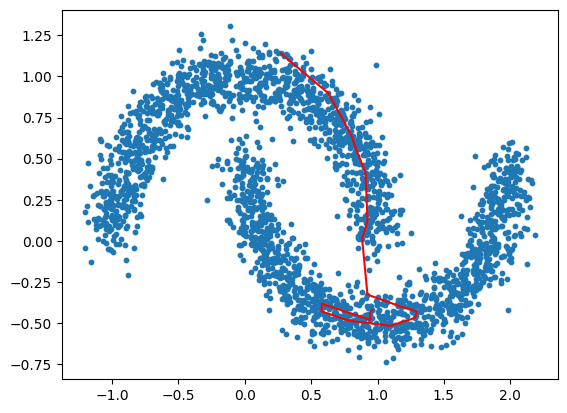

In [20]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

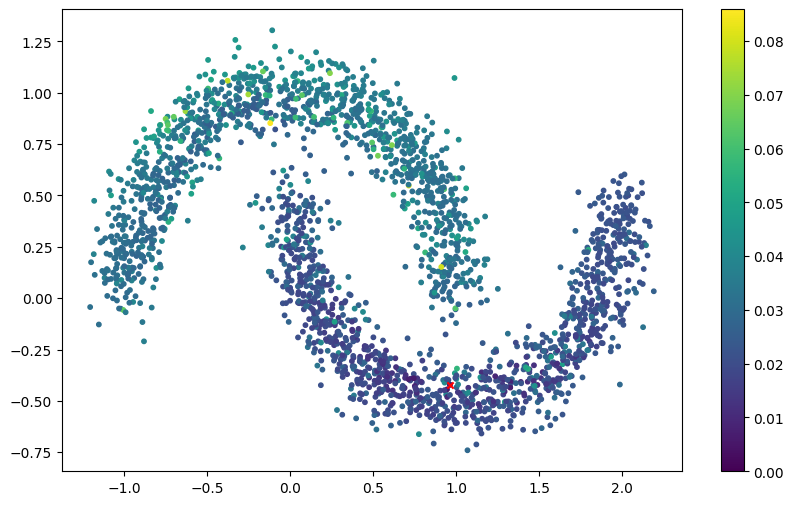

In [21]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
